# Hubble Data: Cosmology with EMCEE Package

As a first step, we create some test data that will be used to fit our model. Let’s assume a linear relationship between the predictor and the response variable, so we take a linear model and add some noise.

In [1]:
import numpy as np
z = np.array([0.07, 0.09, 0.12, 0.17, 0.179, 0.199, 0.2, 0.27,
              0.28, 0.352, 0.3802, 0.4, 0.4004, 0.4247, 0.4497, 0.47,
              0.4783, 0.48, 0.5929, 0.6797, 0.7812, 0.8754, 0.88, 0.9,
              1.037, 1.3, 1.363, 1.43, 1.53, 1.75, 1.965])

hz = np.array([69., 69., 68.6, 83., 75., 75., 72.9, 77., 88.8,
               83., 83., 95., 77., 87.1, 92.8, 89., 80.9, 97.,
               104., 92., 105., 125., 90., 117., 154., 168., 160.,
               177., 140., 202., 186.5])

shz = np.array([19.6, 12., 26.2, 8., 4., 5., 29.6, 14., 36.6, 14., 13.5,
                17., 10.2, 11.2, 12.9, 34., 9., 62., 13., 8., 12., 17.,
                40., 23., 20., 17., 33.6, 18., 14., 40., 50.4])

# Defining the statistical model

The next step is to specify the statistical model.

$H(z)= H_0 \sqrt{\Omega_m (1+z)^3 +(1-\Omega_m)}$

In [2]:
def log_likelihood(z, hz, shz, h0, om):
    n = len(z)
    sum = 0
    for i in range(0, n):
        sum += (hz[i] - h0 * (om * (1 + z[i]) ** 3 + (1 - om)) ** 0.5) ** 2 / (shz[i]) ** 2
    return -(sum)

Text(0.5, 1.0, '')

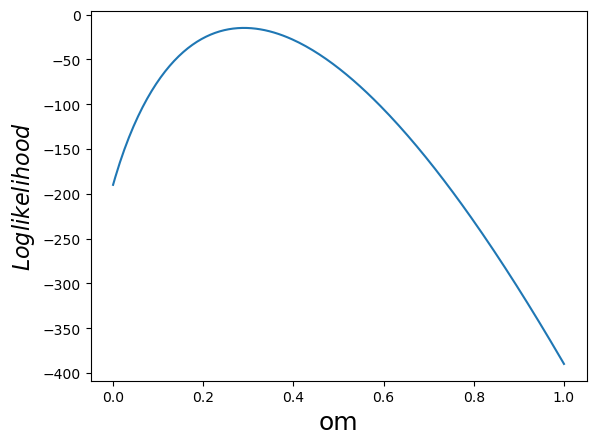

In [24]:
a= np.linspace(0,1,200)
pp= log_likelihood(z,hz,shz,70,a)
plt.plot(a,pp)
plt.xlabel('om',fontsize=18)
plt.ylabel('$Log likelihood$',fontsize=16)
plt.title('')

Text(0.5, 1.0, '')

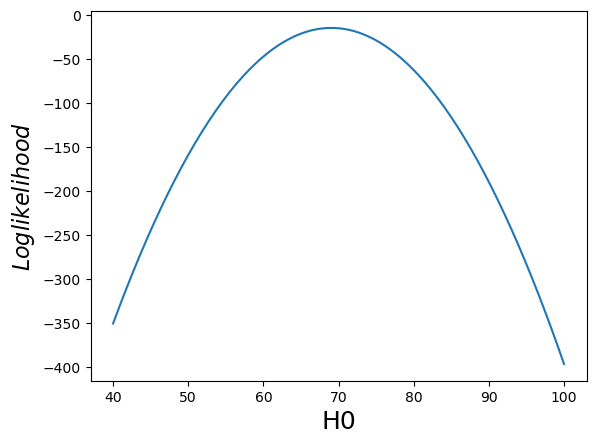

In [25]:
a= np.linspace(40,100,200)
pp= log_likelihood(z,hz,shz,a,0.3)
plt.plot(a,pp)
plt.xlabel('H0',fontsize=18)
plt.ylabel('$Log likelihood$',fontsize=16)
plt.title('')

# Defining the Prior

In [3]:
def log_prior1(h0, om):
    if 50 < h0 < 100 and 0 < om < 1:
        return 0.0
    return -np.inf

# Defining Posterior

In [4]:
def log_posterior(theta):
  h0,om= theta
  lp=log_prior1(h0,om)
  func= log_likelihood(z,hz,shz,h0,om)+ log_prior1(h0,om)
  if not np.isfinite(lp):
    return -np.inf
  return func

In [ ]:
def chi2(h0,om):
  chi= -2 * log_posterior(h0,om)
  return chi
  import scipy.optimize as optimize

def chi2(theta):
    h0, om = theta
    chi= -2 * log_posterior(theta)
    return chi
initial_guess = [70, 0.3]
result = optimize.minimize(chi2,initial_guess)
if result.success:
    fitted_params = result.x
    print(fitted_params)
else:
    raise ValueError(result.message)

# Using the inbuild Scipy library to approximately find a better choice of initial value to start out MCMC

In [5]:
import scipy.optimize as optimize

def chi2(theta):
    h0, om = theta
    chi= -2 * log_posterior(theta)
    return chi

initial_guess = [70, 0.3]
result = optimize.minimize(chi2, initial_guess,method='nelder-mead',
                     options={'maxiter':10000,'xtol': 1e-8, 'disp': True})
if result.success:
    fitted_params = result.x
    print(fitted_params)
else:
    raise ValueError(result.message)

Optimization terminated successfully.
         Current function value: 28.987348
         Iterations: 35
         Function evaluations: 69
[68.15010692  0.31957154]


C:\Users\hp\AppData\Local\Temp\ipykernel_30344\1737188242.py:9: OptimizeWarning: Unknown solver options: xtol
  result = optimize.minimize(chi2, initial_guess,method='nelder-mead',


# Installing the emcee library of Python

In [12]:
!python -m pip install -U pip
!pip install -U setuptools setuptools_scm pep517
!pip install -U emcee
!pip install -U corner

In [13]:
import emcee
import corner
import time
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
from numpy import *

# Define number of dimensions, walkers and steps per walker

In [14]:
ndimension=2
no_of_walkers=6
no_of_steps_per_walker= 10000

# Finding out the initial value for each of the walker. We are chosing the values to be close to the number given by optimization method.

In [15]:
initial_pos_of_walker = [result["x"] + 1e-4*np.random.randn(ndimension) for i in range(no_of_walkers)]
print(initial_pos_of_walker)    

[array([68.15017538,  0.31963882]), array([68.15011057,  0.31964821]), array([68.1501135 ,  0.31947993]), array([68.1499516 ,  0.31959966]), array([68.15013915,  0.31975593]), array([68.149951  ,  0.31965314])]


# Running the emcee sampler

In [16]:
sampler = emcee.EnsembleSampler(no_of_walkers, ndimension, log_posterior, a=2)
print(sampler)
sampler.run_mcmc(initial_pos_of_walker, 
no_of_steps_per_walker, 
rstate0=np.random.get_state(),progress=True);

100%|██████████| 10000/10000 [00:12<00:00, 796.56it/s]


# Using the sampler.chain command to plot the chains

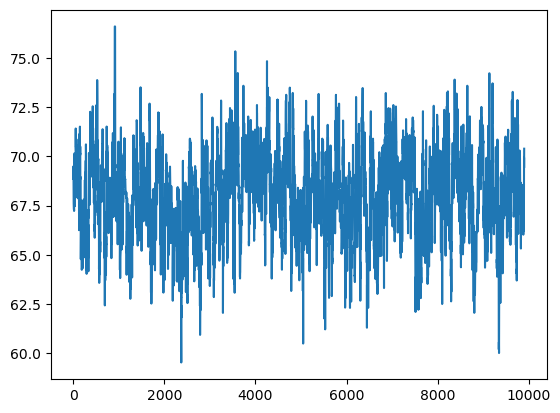

In [20]:
burn_in_steps=100
for i in range(0,no_of_walkers):
        a=sampler.chain[i,burn_in_steps:,0]
        l=len(a)
        n= list(range(l))
plt.plot(n,a)
plt.show()

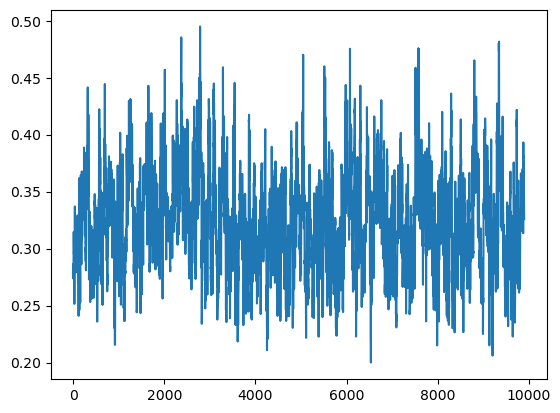

In [21]:
for i in range(0,no_of_walkers):
    a=sampler.chain[i,burn_in_steps:,1]
    l=len(a)
    n= list(range(l))
plt.plot(n,a)
plt.show()

# Plotting the contours and outcome

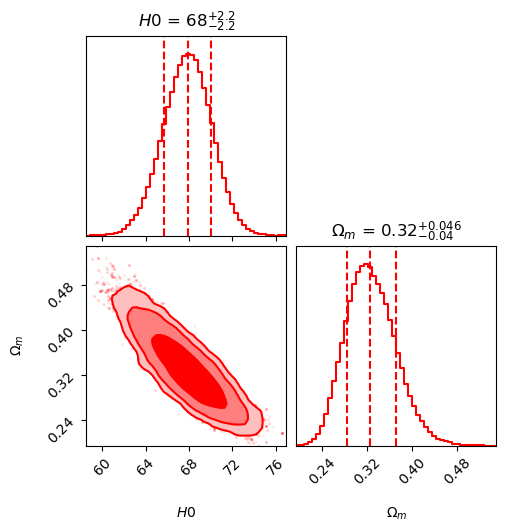

In [22]:
samples = sampler.chain[:, burn_in_steps:, :].reshape((-1, ndimension))
fig = corner.corner(samples,bins=50,labels=["$H0$","$\Omega_m$"],
                    color="red",
                    quantiles=[0.16, 0.5, 0.84],
                    plot_contours=True,
                    fill_contours=True,
                    levels=(0.68,0.95,0.99,),
                    plot_datapoints=True,
                    smooth=True, smooth1d=True,
                    title_fmt=".2g",
                    show_titles=True,
                    divergences=True)
plt.show()